<a href="https://colab.research.google.com/github/Shubhbetter/Voyage-Analytics-Integrating-MLOps-in-Travel-Productionization-of-ML-Systems/blob/main/flight_price_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [ ]:
url = 'https://drive.google.com/file/d/1NL1SFVoGPsRGy4jEKV215iActi8yL6jE/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, encoding='latin1')

In [ ]:
pd.set_option('max_colwidth', None)

In [ ]:
df

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019
...,...,...,...,...,...,...,...,...,...,...
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,07/23/2020


In [ ]:
df.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date'],
      dtype='object')

In [ ]:
df = df.drop(columns=['travelCode', 'userCode', 'date'],axis=1)

In [ ]:
df

,from,to,flightType,price,time,distance,agency
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy
...,...,...,...,...,...,...,...
271883,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy
271884,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy
271885,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy
271886,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.to_csv('flight_data.csv', index=False)

In [ ]:


print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

# Encode categorical variables
le_from = LabelEncoder()
le_to = LabelEncoder()
le_type = LabelEncoder()
le_agency = LabelEncoder()

df['from_encoded'] = le_from.fit_transform(df['from'])
df['to_encoded'] = le_to.fit_transform(df['to'])
df['type_encoded'] = le_type.fit_transform(df['flightType'])
df['agency_encoded'] = le_agency.fit_transform(df['agency'])

# Select features for the model
features = ['from_encoded', 'to_encoded', 'type_encoded', 'agency_encoded', 'time', 'distance']
X = df[features]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Save encoders and model
joblib.dump(le_from, 'le_from.joblib')
joblib.dump(le_to, 'le_to.joblib')
joblib.dump(le_type, 'le_type.joblib')
joblib.dump(le_agency, 'le_agency.joblib')
joblib.dump(model, 'flight_price_model.joblib')



Dataset Shape: (490, 11)

Missing Values:
 from              0
to                0
flightType        0
price             0
time              0
distance          0
agency            0
from_encoded      0
to_encoded        0
type_encoded      0
agency_encoded    0
dtype: int64

Data Types:
 from               object
to                 object
flightType         object
price             float64
time              float64
distance          float64
agency             object
from_encoded        int64
to_encoded          int64
type_encoded        int64
agency_encoded      int64
dtype: object

Model Performance:
Mean Squared Error: 59703.01
R-squared Score: 0.59


['flight_price_model.joblib']

In [ ]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': abs(model.coef_)
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))

AttributeError: module 'numpy' has no attribute 'DataFrame'

In [ ]:
import pandas as pd
import numpy as np

# Assuming you have a list of features corresponding to the columns used during training
features = ['from', 'to', 'agency', 'flightType', 'time', 'distance']

# Feature importance analysis using coefficients from Linear Regression
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': abs(model.coef_)  # For linear models, use abs(coef_) for importance
})

print("\nFeature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))



Feature Importance:
      Feature   Importance
4        time  2539.116252
2      agency   121.275204
3  flightType     8.058714
5    distance     7.694552
1          to     2.645360
0        from     1.935021


In [ ]:
df

,from,to,flightType,price,time,distance,agency,from_encoded,to_encoded,type_encoded,agency_encoded
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,5,3,1,1
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,3,5,1,1
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,1,3,1,0
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,3,1,1,0
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,0,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...
179535,Rio de Janeiro (RJ),Florianopolis (SC),economic,519.10,1.21,466.30,Rainbow,6,3,0,2
179656,Florianopolis (SC),Rio de Janeiro (RJ),premium,481.42,1.21,466.30,Rainbow,3,6,2,2
179657,Rio de Janeiro (RJ),Florianopolis (SC),premium,672.66,1.21,466.30,Rainbow,6,3,2,2
179840,Florianopolis (SC),Salvador (BH),premium,1311.38,2.44,937.77,CloudFy,3,7,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 0 to 179841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   from            490 non-null    object 
 1   to              490 non-null    object 
 2   flightType      490 non-null    object 
 3   price           490 non-null    float64
 4   time            490 non-null    float64
 5   distance        490 non-null    float64
 6   agency          490 non-null    object 
 7   from_encoded    490 non-null    int64  
 8   to_encoded      490 non-null    int64  
 9   type_encoded    490 non-null    int64  
 10  agency_encoded  490 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 45.9+ KB


<ipython-input-22-095630abb41e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_corr.index, y=price_corr.values, palette='coolwarm')


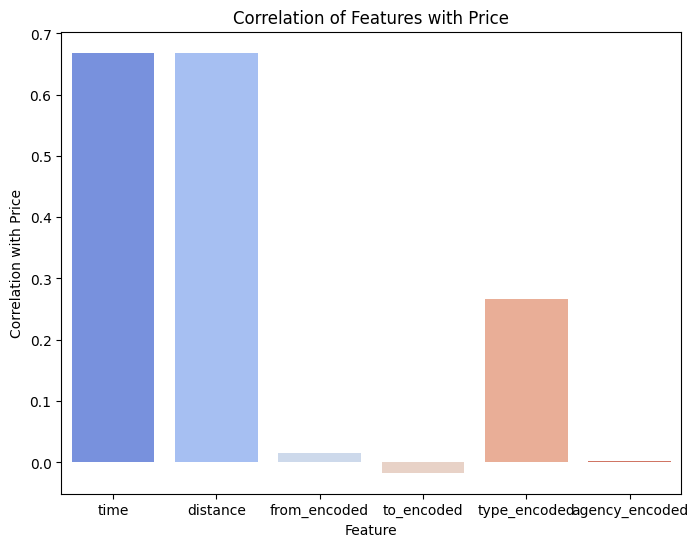

distance          0.668535
time              0.668348
type_encoded      0.266563
from_encoded      0.015118
agency_encoded    0.001711
to_encoded       -0.016753
Name: price, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns including price
numerical_columns = ['price', 'time', 'distance', 'from_encoded', 'to_encoded', 'type_encoded', 'agency_encoded']

# Calculate the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Focus on the correlation of price with other features
price_corr = corr_matrix['price'].drop('price')  # Remove price from its own correlation

# Plot the correlation of price with other features
plt.figure(figsize=(8, 6))
sns.barplot(x=price_corr.index, y=price_corr.values, palette='coolwarm')

# Display the plot
plt.title("Correlation of Features with Price")
plt.xlabel("Feature")
plt.ylabel("Correlation with Price")
plt.show()

# Also print the correlation values
print(price_corr.sort_values(ascending=False))
